# I. Data Preprocessing

- Import the data
- Get the description of the data
- Decrease the dimension of the data
    - Near Zero Variance
    - PCA
    

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_act_1=pd.read_csv('../data/TrainingSet/ACT1_competition_training.csv')
train_act_1.head()

,MOLECULE,Act,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,ACT1_M_80,6.0179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACT1_M_189,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACT1_M_190,5.2697,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACT1_M_402,6.1797,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACT1_M_659,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Summary

In [3]:
train_act_1.describe()

,Act,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,D_15,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
count,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,...,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000
mean,4.690458,0.000081,0.000054,0.000430,0.000107,0.000027,0.000081,0.000242,0.000054,0.000027,...,0.000027,0.000027,0.000081,0.000215,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
std,0.648661,0.015546,0.010364,0.020723,0.010363,0.005182,0.008975,0.015544,0.007328,0.005182,...,0.005182,0.005182,0.008975,0.014655,0.005182,0.005182,0.005182,0.005182,0.005182,0.005182
min,4.300300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.903300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.134000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Check Missing Values

In [4]:
#check missing values
columns = train_act_1.columns
percent_missing = train_act_1.isnull().sum() * 100 / len(train_act_1)
missing_value_train_act_1 = pd.DataFrame({'column_name': columns, 'percent_missing': percent_missing})

missing_value_train_act_1.loc[missing_value_train_act_1['percent_missing'] != 0.0]
# no missing values

,column_name,percent_missing


## Examine the Distribution of the Target(Act) Column
The target is what we are asked to predict: the activity value for each molecule/data set combination in the test set. Note that these are raw activity values and different data sets can have activity measured in different units.

To keep predictions for molecules unique to each data set, a data set identifier has been prepended to each molecule ID (e.g., "ACT1_" or "ACT8_").

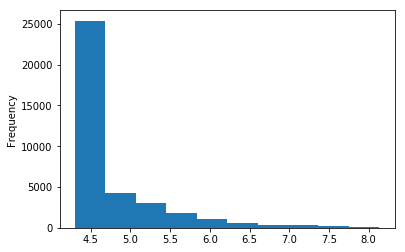

In [5]:
train_act_1['Act'].astype(float).plot.hist()

## Split Training and Test Data

In [6]:
#drop the second column "Act"
X=train_act_1.iloc[:, 2: ]#All features except 'Molecule' and 'Act'
Y=train_act_1['Act']#Y is what we want to predict 

In [7]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in test data:',len(x_test))

Number of samples in training data: 29792
Number of samples in test data: 7449


## Examine the Distribution of the Target after Spliting
Since the distribution is the same, the training test is the unbiased representation of the original dataset.

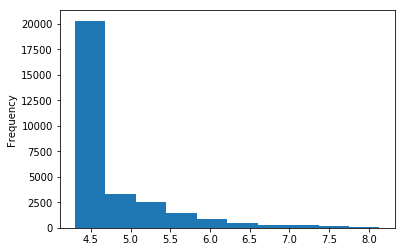

In [8]:
y_train.astype(float).plot.hist()

## Near Zero Variance

In [9]:
# near zero variance function
def remove_feat_constants(data_frame,threshold):
    # Remove feature vectors containing one unique value,
    # because such features do not have predictive value.
    n_features_originally = data_frame.shape[1]
    selector = VarianceThreshold(threshold)
    selector.fit(data_frame)
    # Get the indices of zero variance feats
    feat_ix_keep = selector.get_support(indices=True)
    orig_feat_ix = np.arange(data_frame.columns.size)
    feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
    # Delete zero variance feats from the original pandas data frame
    data_frame = data_frame.drop(labels=data_frame.columns[feat_ix_delete],
                                 axis=1)
    var = sum(data_frame.var())
    n_features_deleted = feat_ix_delete.size
    n_features_leftover = n_features_originally - n_features_deleted
    #print("  - Deleted %s / %s features (~= %.1f %%)" % (
        #n_features_deleted, n_features_originally,
        #100.0 * (np.float(n_features_deleted) / n_features_originally)))
    return data_frame,var,n_features_leftover

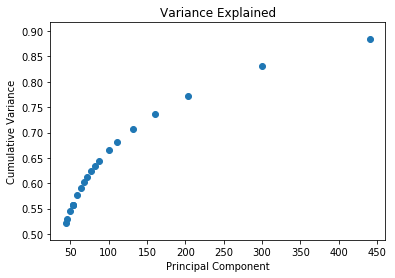

In [10]:
#Create Skree plot
var_t=sum(train_act_1.var())
var_percent_list=[]
n_features_left_list = []
for i in np.linspace(1,15,20):
    _, var_df_1, n_features_left = remove_feat_constants(x_train,i)
    var_percent_list.append(var_df_1/var_t)
    n_features_left_list.append(n_features_left)

plt.scatter(n_features_left_list,var_percent_list)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Variance Explained')
plt.show()

If using 441 features, the cumulative variance reaches 90%. Thus, the 450 features can be a appropriate representation of the original dataset. 

In [11]:
train_act_1_450=remove_feat_constants(x_train,1)[0]
train_act_1_450['Act']=y_train
train_act_1_450.to_csv('ACT1_train_450.csv')

## PCA

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
# PCA without standardizing X
num_features = 150
pca_150 = PCA(n_components=num_features)
principal_components_150 = pca_150.fit(X)
variance_150 = np.cumsum(np.round(principal_components_150.explained_variance_ratio_, decimals=3)*100)

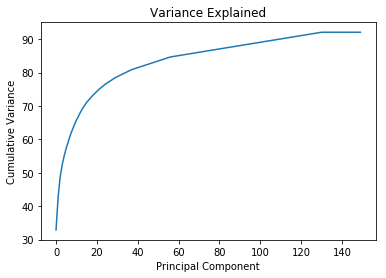

In [14]:
plt.plot(range(num_features), variance_150)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Variance Explained')
plt.show()

## Correlation Heatmap

In [16]:
# Remove features if the variance is below 1
train_act_1_corr = remove_feat_constants(train_act_1_450,1)[0]

In [17]:
train_act_1_corr['Act']=train_act_1['Act']

In [18]:
# Find correlations with the target and sort
correlations = train_act_1_corr.corr()['Act'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 D_1114    0.150538
D_462     0.155963
D_506     0.159412
D_520     0.160163
D_834     0.163638
D_516     0.165039
D_519     0.177398
D_5524    0.187719
D_468     0.188489
D_2466    0.190733
D_518     0.193983
D_517     0.195256
D_4861    0.202868
D_4849    0.264075
Act       1.000000
Name: Act, dtype: float64

Most Negative Correlations:
 D_2129   -0.159339
D_2135   -0.158269
D_2136   -0.154638
D_2134   -0.148749
D_2138   -0.144842
D_2137   -0.141777
D_2133   -0.140471
D_2132   -0.139734
D_2131   -0.137044
D_2130   -0.134398
D_2139   -0.134321
D_2140   -0.129671
D_2142   -0.129231
D_2141   -0.127414
D_1217   -0.125435
Name: Act, dtype: float64


In [19]:
# Extract the features with highest variance and absolute correlation
ext_data = train_act_1_corr[['Act', 'D_4849', 'D_4861', 'D_517', 'D_518','D_2466','D_468']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,Act,D_4849,D_4861,D_517,D_518,D_2466,D_468
Act,1.000000,0.264075,0.202868,0.195256,0.193983,0.190733,0.188489
D_4849,0.264075,1.000000,0.257138,0.059236,0.025991,0.709478,-0.007737
D_4861,0.202868,0.257138,1.000000,0.303356,0.302454,0.184854,0.121967
D_517,0.195256,0.059236,0.303356,1.000000,0.757377,0.018066,0.277197
D_518,0.193983,0.025991,0.302454,0.757377,1.000000,-0.013446,0.256572
D_2466,0.190733,0.709478,0.184854,0.018066,-0.013446,1.000000,0.070696
D_468,0.188489,-0.007737,0.121967,0.277197,0.256572,0.070696,1.000000


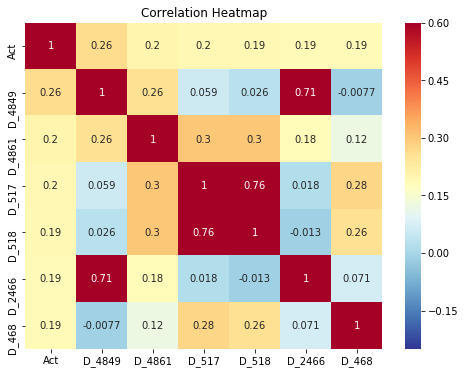

In [20]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

# II. Model Development

- Develop baseline model in keras
- Preliminary investigation of model


In [2]:
#Imports
from tensorflow.keras.models import Sequential
import keras
from sklearn.model_selection import train_test_split
import numpy as np
from keras import backend as K
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam 
import pandas as pd



In [3]:
#Reading CSV file
# train_1 = train_act_1_450  #use this if you do not have the file
train_1 = pd.read_csv('ACT1_train_450.csv', dtype={"MOLECULE": object, "Act": float})


In [4]:
#Develop Training and Test sets
y = train_1['Act'].values
train_1 = train_1.drop(['Act', 'Unnamed: 0'], axis = 1)
x = train_1.values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.80, random_state = 0)
#reshaping matrices
print(np.shape(Y_train), np.shape(X_train), np.shape(Y_test), np.shape(X_test))
Y_train = np.reshape(Y_train,(len(Y_train),1))
Y_test = np.reshape(Y_test,(len(Y_test),1))
#Empty array to store R^2 values
R_2 = []

C:\Users\willi\Anaconda3\envs\data-x\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(29792,) (29792, 442) (7449,) (7449, 442)


In [5]:
#R^2 function for keras and tensorflow obtained from: https://github.com/CathyQian/Data_Science_Projects/blob/master/ and 
#https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/34019
def r_square(X, Y):
    """ r^2 value defined by the competition host, r^2 = 1 indicates 100% prediction accuracy
    """
    avx = np.mean(X)
    avy = np.mean(Y)
    sum1, sumx, sumy = 0, 0, 0
    for i in range(len(X)):
        sum1 += (X[i] - avx)*(Y[i] - avy)
        sumx += (X[i] - avx)*(X[i] - avx)
        sumy += (Y[i] - avy)*(Y[i] - avy)
    print(len(X), sum1, sumx, sumy)
    return sum1*sum1/(sumx*sumy)

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [6]:
#Reset Model
from keras import backend as K
K.clear_session()

In [7]:
#Keras Sequential Model:
model = keras.models.Sequential()
model.add(keras.layers.core.Dense(units = 50, activation='relu', input_dim = 442))
model.add(keras.layers.core.Dense(25, activation='relu'))
model.add(keras.layers.core.Dense(1, activation = 'relu'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss="mean_squared_error", optimizer=adam, metrics = [coeff_determination])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                22150     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 23,451
Trainable params: 23,451
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
#Run the model
model.fit(X_train, Y_train, epochs = 100, batch_size= 300)
R_2 = np.append(R_2,model.evaluate(X_test, Y_test,verbose=False)[1])

Epoch 1/100
29792/29792 [==============================] - 1s 17us/step - loss: 3.2948 - coeff_determination: -7.2093
Epoch 2/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.5063 - coeff_determination: -0.2288
Epoch 3/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.3698 - coeff_determination: 0.1013
Epoch 4/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.3167 - coeff_determination: 0.2279
Epoch 5/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.2847 - coeff_determination: 0.3104
Epoch 6/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.2623 - coeff_determination: 0.3585
Epoch 7/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.2465 - coeff_determination: 0.4011
Epoch 8/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.2342 - coeff_determination: 0.4331
Epoch 9/100
29792/29792 [==============================] - 0s 

29792/29792 [==============================] - 0s 10us/step - loss: 0.1097 - coeff_determination: 0.7330
Epoch 71/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.1074 - coeff_determination: 0.7373
Epoch 72/100
29792/29792 [==============================] - 0s 11us/step - loss: 0.1043 - coeff_determination: 0.7469
Epoch 73/100
29792/29792 [==============================] - 0s 11us/step - loss: 0.1058 - coeff_determination: 0.7423
Epoch 74/100
29792/29792 [==============================] - 0s 11us/step - loss: 0.1049 - coeff_determination: 0.7445
Epoch 75/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.1041 - coeff_determination: 0.7476
Epoch 76/100
29792/29792 [==============================] - 0s 9us/step - loss: 0.1028 - coeff_determination: 0.7500
Epoch 77/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.1037 - coeff_determination: 0.7469
Epoch 78/100
29792/29792 [==============================] - 0s 11us/st

## Model Investigation: Plots 

In [9]:
#Script to generate evaluation R_2 values for different epochs
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam 

for epochs in [10,25,50,100,200,300,400,500]:
    #Reset model
    K.clear_session()
    #Regenerate Model
    model = keras.models.Sequential()
    model.add(keras.layers.core.Dense(units = 50, activation='relu', input_dim = 442))
    model.add(keras.layers.core.Dense(25, activation='relu'))
    model.add(keras.layers.core.Dense(1, activation = 'relu'))
    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="mean_squared_error", optimizer=adam, metrics = [coeff_determination])
    print(model.summary())
    #Train Model
    history = model.fit(X_train, Y_train, epochs = epochs, batch_size= 300)
    #Store R_2 value
    R_2 = np.append(R_2,model.evaluate(X_test, Y_test,verbose=False)[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                22150     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 23,451
Trainable params: 23,451
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
29792/29792 [==============================] - 1s 17us/step - loss: 2.1529 - coeff_determination: -4.2842
Epoch 2/10
29792/29792 [==============================] - 0s 10us/step - loss: 0.5009 - coeff_determination: -0.2200
Epoch 3/10
29792/29792 [==============================] - 0s 10us/step - loss: 0.3728 - coeff_determination: 0.0959
Epoch 4/10
29792/29792 [=======================

29792/29792 [==============================] - 0s 10us/step - loss: 0.1756 - coeff_determination: 0.5730
Epoch 18/50
29792/29792 [==============================] - 0s 10us/step - loss: 0.1743 - coeff_determination: 0.5769
Epoch 19/50
29792/29792 [==============================] - 0s 11us/step - loss: 0.1685 - coeff_determination: 0.5921
Epoch 20/50
29792/29792 [==============================] - 0s 10us/step - loss: 0.1653 - coeff_determination: 0.6002
Epoch 21/50
29792/29792 [==============================] - 0s 10us/step - loss: 0.1658 - coeff_determination: 0.5982
Epoch 22/50
29792/29792 [==============================] - 0s 10us/step - loss: 0.1650 - coeff_determination: 0.5994
Epoch 23/50
29792/29792 [==============================] - 0s 10us/step - loss: 0.1620 - coeff_determination: 0.6065
Epoch 24/50
29792/29792 [==============================] - 0s 10us/step - loss: 0.1572 - coeff_determination: 0.6192
Epoch 25/50
29792/29792 [==============================] - 0s 10us/step - lo

29792/29792 [==============================] - 0s 12us/step - loss: 0.1458 - coeff_determination: 0.6455
Epoch 31/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.1469 - coeff_determination: 0.6415
Epoch 32/100
29792/29792 [==============================] - 0s 10us/step - loss: 0.1454 - coeff_determination: 0.6466
Epoch 33/100
29792/29792 [==============================] - 0s 11us/step - loss: 0.1486 - coeff_determination: 0.6381
Epoch 34/100
29792/29792 [==============================] - 0s 11us/step - loss: 0.1451 - coeff_determination: 0.6462
Epoch 35/100
29792/29792 [==============================] - 0s 11us/step - loss: 0.1379 - coeff_determination: 0.6621
Epoch 36/100
29792/29792 [==============================] - 0s 12us/step - loss: 0.1411 - coeff_determination: 0.6554
Epoch 37/100
29792/29792 [==============================] - 0s 11us/step - loss: 0.1369 - coeff_determination: 0.6679
Epoch 38/100
29792/29792 [==============================] - 0s 11us/s

29792/29792 [==============================] - 0s 12us/step - loss: 0.0905 - coeff_determination: 0.7799
Epoch 100/100
29792/29792 [==============================] - 0s 11us/step - loss: 0.0897 - coeff_determination: 0.7814
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                22150     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 23,451
Trainable params: 23,451
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
29792/29792 [==============================] - 1s 18us/step - loss: 1.0964 - coeff_determination: -1.6290
Epoch 2/200
29792/29792 [==============================

29792/29792 [==============================] - 0s 12us/step - loss: 0.1149 - coeff_determination: 0.7198
Epoch 63/200
29792/29792 [==============================] - 0s 12us/step - loss: 0.1111 - coeff_determination: 0.7294
Epoch 64/200
29792/29792 [==============================] - 0s 11us/step - loss: 0.1100 - coeff_determination: 0.7315
Epoch 65/200
29792/29792 [==============================] - 0s 11us/step - loss: 0.1127 - coeff_determination: 0.7268
Epoch 66/200
29792/29792 [==============================] - 0s 11us/step - loss: 0.1095 - coeff_determination: 0.7336
Epoch 67/200
29792/29792 [==============================] - 0s 11us/step - loss: 0.1122 - coeff_determination: 0.7252
Epoch 68/200
29792/29792 [==============================] - 0s 12us/step - loss: 0.1108 - coeff_determination: 0.7303
Epoch 69/200
29792/29792 [==============================] - 0s 12us/step - loss: 0.1129 - coeff_determination: 0.7266
Epoch 70/200
29792/29792 [==============================] - 0s 12us/s

29792/29792 [==============================] - 0s 12us/step - loss: 0.0793 - coeff_determination: 0.8076
Epoch 132/200
29792/29792 [==============================] - 0s 12us/step - loss: 0.0839 - coeff_determination: 0.7948
Epoch 133/200
29792/29792 [==============================] - 0s 12us/step - loss: 0.0792 - coeff_determination: 0.8079
Epoch 134/200
29792/29792 [==============================] - 0s 12us/step - loss: 0.0800 - coeff_determination: 0.8050
Epoch 135/200
29792/29792 [==============================] - 0s 12us/step - loss: 0.0798 - coeff_determination: 0.8053
Epoch 136/200
29792/29792 [==============================] - 0s 11us/step - loss: 0.0823 - coeff_determination: 0.7991
Epoch 137/200
29792/29792 [==============================] - 0s 11us/step - loss: 0.0828 - coeff_determination: 0.7988
Epoch 138/200
29792/29792 [==============================] - 0s 12us/step - loss: 0.0797 - coeff_determination: 0.8047
Epoch 139/200
29792/29792 [==============================] - 0

Epoch 200/200
29792/29792 [==============================] - 0s 12us/step - loss: 0.0647 - coeff_determination: 0.8414
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                22150     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 23,451
Trainable params: 23,451
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
29792/29792 [==============================] - 1s 19us/step - loss: 22.4220 - coeff_determination: -53.9247
Epoch 2/300
29792/29792 [==============================] - 0s 11us/step - loss: 13.3782 - coeff_determination: -31.0651
Epoch 3/300
29792/29792 [=============

29792/29792 [==============================] - 0s 11us/step - loss: 0.1271 - coeff_determination: 0.6918
Epoch 64/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.1276 - coeff_determination: 0.6889
Epoch 65/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.1260 - coeff_determination: 0.6939
Epoch 66/300
29792/29792 [==============================] - 0s 13us/step - loss: 0.1248 - coeff_determination: 0.6970
Epoch 67/300
29792/29792 [==============================] - 0s 16us/step - loss: 0.1244 - coeff_determination: 0.6976
Epoch 68/300
29792/29792 [==============================] - 1s 17us/step - loss: 0.1239 - coeff_determination: 0.6992
Epoch 69/300
29792/29792 [==============================] - 0s 13us/step - loss: 0.1255 - coeff_determination: 0.6953
Epoch 70/300
29792/29792 [==============================] - 0s 14us/step - loss: 0.1202 - coeff_determination: 0.7052
Epoch 71/300
29792/29792 [==============================] - 0s 13us/s

29792/29792 [==============================] - 0s 10us/step - loss: 0.0933 - coeff_determination: 0.7718
Epoch 133/300
29792/29792 [==============================] - 0s 10us/step - loss: 0.0940 - coeff_determination: 0.7700
Epoch 134/300
29792/29792 [==============================] - 0s 10us/step - loss: 0.0926 - coeff_determination: 0.7746
Epoch 135/300
29792/29792 [==============================] - 0s 10us/step - loss: 0.0936 - coeff_determination: 0.7725
Epoch 136/300
29792/29792 [==============================] - 0s 10us/step - loss: 0.0946 - coeff_determination: 0.7685
Epoch 137/300
29792/29792 [==============================] - 0s 10us/step - loss: 0.0936 - coeff_determination: 0.7727
Epoch 138/300
29792/29792 [==============================] - 0s 10us/step - loss: 0.0938 - coeff_determination: 0.7725
Epoch 139/300
29792/29792 [==============================] - 0s 10us/step - loss: 0.0930 - coeff_determination: 0.7736
Epoch 140/300
29792/29792 [==============================] - 0

29792/29792 [==============================] - 0s 9us/step - loss: 0.0756 - coeff_determination: 0.8166
Epoch 202/300
29792/29792 [==============================] - 0s 10us/step - loss: 0.0743 - coeff_determination: 0.8186
Epoch 203/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.0749 - coeff_determination: 0.8176
Epoch 204/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.0764 - coeff_determination: 0.8136
Epoch 205/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.0766 - coeff_determination: 0.8132
Epoch 206/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.0742 - coeff_determination: 0.8198
Epoch 207/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.0745 - coeff_determination: 0.8185
Epoch 208/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.0749 - coeff_determination: 0.8175
Epoch 209/300
29792/29792 [==============================] - 0s

29792/29792 [==============================] - 0s 11us/step - loss: 0.0651 - coeff_determination: 0.8416
Epoch 271/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.0641 - coeff_determination: 0.8436
Epoch 272/300
29792/29792 [==============================] - 0s 12us/step - loss: 0.0655 - coeff_determination: 0.8405
Epoch 273/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.0662 - coeff_determination: 0.8380
Epoch 274/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.0648 - coeff_determination: 0.8407
Epoch 275/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.0633 - coeff_determination: 0.8463
Epoch 276/300
29792/29792 [==============================] - 0s 12us/step - loss: 0.0668 - coeff_determination: 0.8359
Epoch 277/300
29792/29792 [==============================] - 0s 11us/step - loss: 0.0638 - coeff_determination: 0.8440
Epoch 278/300
29792/29792 [==============================] - 0

29792/29792 [==============================] - 0s 12us/step - loss: 0.1432 - coeff_determination: 0.6540
Epoch 34/400
29792/29792 [==============================] - 0s 11us/step - loss: 0.1367 - coeff_determination: 0.6669
Epoch 35/400
29792/29792 [==============================] - 0s 11us/step - loss: 0.1334 - coeff_determination: 0.6755
Epoch 36/400
29792/29792 [==============================] - 0s 13us/step - loss: 0.1383 - coeff_determination: 0.6608
Epoch 37/400
29792/29792 [==============================] - 0s 11us/step - loss: 0.1320 - coeff_determination: 0.6790
Epoch 38/400
29792/29792 [==============================] - 0s 11us/step - loss: 0.1313 - coeff_determination: 0.6815
Epoch 39/400
29792/29792 [==============================] - 0s 12us/step - loss: 0.1268 - coeff_determination: 0.6923
Epoch 40/400
29792/29792 [==============================] - 0s 11us/step - loss: 0.1271 - coeff_determination: 0.6914
Epoch 41/400
29792/29792 [==============================] - 0s 11us/s

29792/29792 [==============================] - 0s 11us/step - loss: 0.0791 - coeff_determination: 0.8072
Epoch 103/400
29792/29792 [==============================] - 0s 11us/step - loss: 0.0802 - coeff_determination: 0.8054
Epoch 104/400
29792/29792 [==============================] - 0s 12us/step - loss: 0.0765 - coeff_determination: 0.8138
Epoch 105/400
29792/29792 [==============================] - 0s 12us/step - loss: 0.0785 - coeff_determination: 0.8086
Epoch 106/400
29792/29792 [==============================] - 0s 12us/step - loss: 0.0761 - coeff_determination: 0.8148
Epoch 107/400
29792/29792 [==============================] - 0s 12us/step - loss: 0.0794 - coeff_determination: 0.8067
Epoch 108/400
29792/29792 [==============================] - 0s 12us/step - loss: 0.0776 - coeff_determination: 0.8108
Epoch 109/400
29792/29792 [==============================] - 0s 12us/step - loss: 0.0756 - coeff_determination: 0.8152
Epoch 110/400
29792/29792 [==============================] - 0

Epoch 171/400
29792/29792 [==============================] - 0s 15us/step - loss: 0.0593 - coeff_determination: 0.8562
Epoch 172/400
29792/29792 [==============================] - 1s 17us/step - loss: 0.0564 - coeff_determination: 0.8634
Epoch 173/400
29792/29792 [==============================] - 0s 14us/step - loss: 0.0589 - coeff_determination: 0.8557
Epoch 174/400
29792/29792 [==============================] - 0s 15us/step - loss: 0.0584 - coeff_determination: 0.8581
Epoch 175/400
29792/29792 [==============================] - 0s 13us/step - loss: 0.0584 - coeff_determination: 0.8574
Epoch 176/400
29792/29792 [==============================] - 0s 15us/step - loss: 0.0626 - coeff_determination: 0.8472
Epoch 177/400
29792/29792 [==============================] - 1s 38us/step - loss: 0.0571 - coeff_determination: 0.8616
Epoch 178/400
29792/29792 [==============================] - 1s 30us/step - loss: 0.0573 - coeff_determination: 0.8603: 0s - loss: 0.0546 - coeff_determ
Epoch 179/400


29792/29792 [==============================] - 1s 20us/step - loss: 0.0488 - coeff_determination: 0.8813
Epoch 239/400
29792/29792 [==============================] - 1s 20us/step - loss: 0.0477 - coeff_determination: 0.8842
Epoch 240/400
29792/29792 [==============================] - 1s 20us/step - loss: 0.0496 - coeff_determination: 0.8784
Epoch 241/400
29792/29792 [==============================] - 1s 21us/step - loss: 0.0483 - coeff_determination: 0.8820
Epoch 242/400
29792/29792 [==============================] - 1s 17us/step - loss: 0.0462 - coeff_determination: 0.8865
Epoch 243/400
29792/29792 [==============================] - 0s 14us/step - loss: 0.0489 - coeff_determination: 0.8813
Epoch 244/400
29792/29792 [==============================] - 0s 13us/step - loss: 0.0468 - coeff_determination: 0.8866
Epoch 245/400
29792/29792 [==============================] - 0s 13us/step - loss: 0.0467 - coeff_determination: 0.8867
Epoch 246/400
29792/29792 [==============================] - 0

29792/29792 [==============================] - 0s 14us/step - loss: 0.0424 - coeff_determination: 0.8959
Epoch 307/400
29792/29792 [==============================] - 0s 14us/step - loss: 0.0422 - coeff_determination: 0.8977
Epoch 308/400
29792/29792 [==============================] - 0s 14us/step - loss: 0.0433 - coeff_determination: 0.8951
Epoch 309/400
29792/29792 [==============================] - 0s 14us/step - loss: 0.0436 - coeff_determination: 0.8938
Epoch 310/400
29792/29792 [==============================] - 0s 14us/step - loss: 0.0435 - coeff_determination: 0.8940
Epoch 311/400
29792/29792 [==============================] - 0s 14us/step - loss: 0.0435 - coeff_determination: 0.8937
Epoch 312/400
29792/29792 [==============================] - 0s 13us/step - loss: 0.0415 - coeff_determination: 0.8992
Epoch 313/400
29792/29792 [==============================] - 0s 14us/step - loss: 0.0403 - coeff_determination: 0.9015
Epoch 314/400
29792/29792 [==============================] - 0

Epoch 375/400
29792/29792 [==============================] - 1s 17us/step - loss: 0.0387 - coeff_determination: 0.9057
Epoch 376/400
29792/29792 [==============================] - 1s 21us/step - loss: 0.0377 - coeff_determination: 0.9075
Epoch 377/400
29792/29792 [==============================] - 1s 18us/step - loss: 0.0373 - coeff_determination: 0.9085
Epoch 378/400
29792/29792 [==============================] - 1s 21us/step - loss: 0.0395 - coeff_determination: 0.9037
Epoch 379/400
29792/29792 [==============================] - 1s 21us/step - loss: 0.0388 - coeff_determination: 0.9052
Epoch 380/400
29792/29792 [==============================] - 1s 19us/step - loss: 0.0374 - coeff_determination: 0.9090
Epoch 381/400
29792/29792 [==============================] - 1s 20us/step - loss: 0.0390 - coeff_determination: 0.9051
Epoch 382/400
29792/29792 [==============================] - 1s 21us/step - loss: 0.0391 - coeff_determination: 0.9045
Epoch 383/400
29792/29792 [=====================

29792/29792 [==============================] - 1s 17us/step - loss: 0.1523 - coeff_determination: 0.6289
Epoch 39/500
29792/29792 [==============================] - 1s 17us/step - loss: 0.1504 - coeff_determination: 0.6334
Epoch 40/500
29792/29792 [==============================] - 1s 18us/step - loss: 0.1489 - coeff_determination: 0.6372
Epoch 41/500
29792/29792 [==============================] - 1s 18us/step - loss: 0.1508 - coeff_determination: 0.6337
Epoch 42/500
29792/29792 [==============================] - 1s 19us/step - loss: 0.1463 - coeff_determination: 0.6447
Epoch 43/500
29792/29792 [==============================] - 1s 43us/step - loss: 0.1452 - coeff_determination: 0.6484
Epoch 44/500
29792/29792 [==============================] - 1s 23us/step - loss: 0.1445 - coeff_determination: 0.6486
Epoch 45/500
29792/29792 [==============================] - 1s 29us/step - loss: 0.1405 - coeff_determination: 0.6612
Epoch 46/500
29792/29792 [==============================] - 1s 22us/s

29792/29792 [==============================] - 1s 21us/step - loss: 0.0971 - coeff_determination: 0.7646
Epoch 107/500
29792/29792 [==============================] - 1s 18us/step - loss: 0.0978 - coeff_determination: 0.7614
Epoch 108/500
29792/29792 [==============================] - 1s 19us/step - loss: 0.0950 - coeff_determination: 0.7688
Epoch 109/500
29792/29792 [==============================] - 1s 20us/step - loss: 0.0986 - coeff_determination: 0.7603
Epoch 110/500
29792/29792 [==============================] - 1s 21us/step - loss: 0.0960 - coeff_determination: 0.7665
Epoch 111/500
29792/29792 [==============================] - 1s 21us/step - loss: 0.0967 - coeff_determination: 0.7636
Epoch 112/500
29792/29792 [==============================] - 1s 20us/step - loss: 0.0996 - coeff_determination: 0.7583
Epoch 113/500
29792/29792 [==============================] - 1s 20us/step - loss: 0.0966 - coeff_determination: 0.7655
Epoch 114/500
29792/29792 [==============================] - 1

29792/29792 [==============================] - 1s 18us/step - loss: 0.0772 - coeff_determination: 0.8121
Epoch 175/500
29792/29792 [==============================] - 1s 18us/step - loss: 0.0807 - coeff_determination: 0.8041
Epoch 176/500
29792/29792 [==============================] - 1s 19us/step - loss: 0.0781 - coeff_determination: 0.8109
Epoch 177/500
29792/29792 [==============================] - 1s 19us/step - loss: 0.0779 - coeff_determination: 0.8108
Epoch 178/500
29792/29792 [==============================] - 1s 17us/step - loss: 0.0777 - coeff_determination: 0.8116
Epoch 179/500
29792/29792 [==============================] - 0s 17us/step - loss: 0.0757 - coeff_determination: 0.8160
Epoch 180/500
29792/29792 [==============================] - 1s 18us/step - loss: 0.0769 - coeff_determination: 0.8124
Epoch 181/500
29792/29792 [==============================] - 1s 17us/step - loss: 0.0766 - coeff_determination: 0.8135
Epoch 182/500
29792/29792 [==============================] - 1

29792/29792 [==============================] - 1s 17us/step - loss: 0.0664 - coeff_determination: 0.8377
Epoch 243/500
29792/29792 [==============================] - 1s 18us/step - loss: 0.0654 - coeff_determination: 0.8399
Epoch 244/500
29792/29792 [==============================] - 1s 17us/step - loss: 0.0645 - coeff_determination: 0.8435
Epoch 245/500
29792/29792 [==============================] - 0s 17us/step - loss: 0.0667 - coeff_determination: 0.8366
Epoch 246/500
29792/29792 [==============================] - 0s 17us/step - loss: 0.0675 - coeff_determination: 0.8357
Epoch 247/500
29792/29792 [==============================] - 1s 17us/step - loss: 0.0651 - coeff_determination: 0.8418
Epoch 248/500
29792/29792 [==============================] - 0s 16us/step - loss: 0.0654 - coeff_determination: 0.8403
Epoch 249/500
29792/29792 [==============================] - 1s 17us/step - loss: 0.0665 - coeff_determination: 0.8381
Epoch 250/500
29792/29792 [==============================] - 0

29792/29792 [==============================] - 0s 16us/step - loss: 0.0589 - coeff_determination: 0.8571
Epoch 311/500
29792/29792 [==============================] - 1s 18us/step - loss: 0.0598 - coeff_determination: 0.8534
Epoch 312/500
29792/29792 [==============================] - 1s 18us/step - loss: 0.0607 - coeff_determination: 0.8528
Epoch 313/500
29792/29792 [==============================] - 0s 17us/step - loss: 0.0588 - coeff_determination: 0.8562
Epoch 314/500
29792/29792 [==============================] - 1s 17us/step - loss: 0.0602 - coeff_determination: 0.8538
Epoch 315/500
29792/29792 [==============================] - 0s 17us/step - loss: 0.0590 - coeff_determination: 0.8565
Epoch 316/500
29792/29792 [==============================] - 1s 18us/step - loss: 0.0597 - coeff_determination: 0.8548
Epoch 317/500
29792/29792 [==============================] - 1s 17us/step - loss: 0.0581 - coeff_determination: 0.8583
Epoch 318/500
29792/29792 [==============================] - 1

29792/29792 [==============================] - 1s 19us/step - loss: 0.0549 - coeff_determination: 0.8659
Epoch 379/500
29792/29792 [==============================] - 1s 19us/step - loss: 0.0529 - coeff_determination: 0.8716
Epoch 380/500
29792/29792 [==============================] - 1s 19us/step - loss: 0.0528 - coeff_determination: 0.8716
Epoch 381/500
29792/29792 [==============================] - 1s 19us/step - loss: 0.0539 - coeff_determination: 0.8692
Epoch 382/500
29792/29792 [==============================] - 1s 20us/step - loss: 0.0531 - coeff_determination: 0.8708
Epoch 383/500
29792/29792 [==============================] - 1s 20us/step - loss: 0.0548 - coeff_determination: 0.8670
Epoch 384/500
29792/29792 [==============================] - 1s 19us/step - loss: 0.0535 - coeff_determination: 0.8696
Epoch 385/500
29792/29792 [==============================] - 1s 18us/step - loss: 0.0530 - coeff_determination: 0.8699: 0s - loss: 0.0536 - coeff_determination
Epoch 386/500
29792/2

29792/29792 [==============================] - 1s 21us/step - loss: 0.0492 - coeff_determination: 0.8798
Epoch 446/500
29792/29792 [==============================] - 1s 21us/step - loss: 0.0498 - coeff_determination: 0.8787
Epoch 447/500
29792/29792 [==============================] - 1s 22us/step - loss: 0.0503 - coeff_determination: 0.8766
Epoch 448/500
29792/29792 [==============================] - 1s 22us/step - loss: 0.0489 - coeff_determination: 0.8809
Epoch 449/500
29792/29792 [==============================] - 1s 20us/step - loss: 0.0483 - coeff_determination: 0.8825
Epoch 450/500
29792/29792 [==============================] - 1s 21us/step - loss: 0.0486 - coeff_determination: 0.8811
Epoch 451/500
29792/29792 [==============================] - 1s 21us/step - loss: 0.0498 - coeff_determination: 0.8784
Epoch 452/500
29792/29792 [==============================] - 1s 24us/step - loss: 0.0506 - coeff_determination: 0.8772
Epoch 453/500
29792/29792 [==============================] - 1

### Performance of Baseline Model over Various Epochs

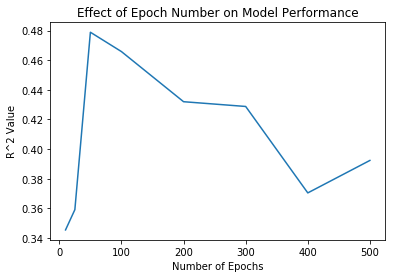

In [15]:
import matplotlib.pyplot as plt

#Eliminate nonsensical R_2 values
for i in range(len(R_2)):
    if R_2[i]<0:
        R_2[i] = 0
        
plt.plot([10,25,50,100,200,300,400,500], R_2)
plt.xlabel('Number of Epochs')
plt.ylabel('R^2 Value')
plt.title('Effect of Epoch Number on Model Performance')
plt.show()

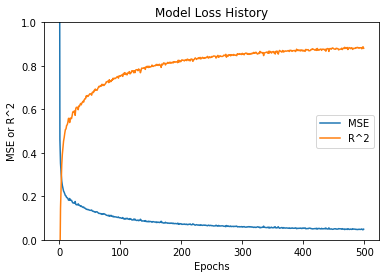

In [16]:
#script to plot the RMSE loss/R_2 value as a function of epochs 
plt.plot(history.history['loss'])
plt.plot(history.history['coeff_determination'])
plt.title('Model Loss History')
plt.ylim(0,1)
plt.ylabel('MSE or R^2')
plt.xlabel('Epochs')
plt.legend(['MSE', 'R^2'])
